In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv("../data/imdb_1000.csv")
#import imdb as dataframe

In [3]:
type(movies)

pandas.core.frame.DataFrame

In [4]:
#number rows and columns
movies.shape

(979, 6)

In [7]:
#data type
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [8]:
#avg duration
movies.duration.mean()

120.97957099080695

In [10]:
#sort short to long movies
movies.sort('duration').head(1)

C:\Users\linje3\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,star_rating,title,content_rating,genre,duration,actors_list
389,8,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."


In [11]:
movies.sort('duration').tail(1)

C:\Users\linje3\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

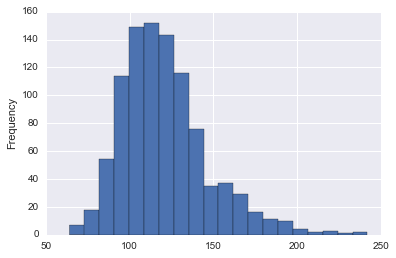

In [22]:
movies.duration.plot(kind="hist",bins=20)

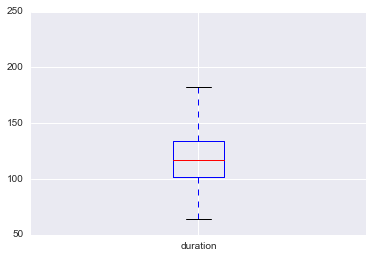

In [23]:
movies.duration.plot(kind="box")

In [18]:
#count how many movies have each of the content ratings
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

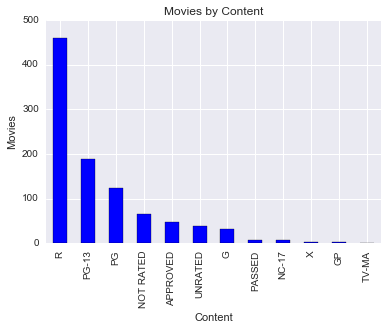

In [24]:
#use a visualization to display that same data, including a title and x and y labels
movies.content_rating.value_counts().plot(kind='bar', title='Movies by Content')
plt.xlabel('Content')
plt.ylabel('Movies')

In [25]:
#convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace=True)

In [26]:
#convert the following content ratings to "NC-17": X, TV-MA
movies.content_rating.replace(['X', 'TV-MA'], 'NC-17', inplace=True)

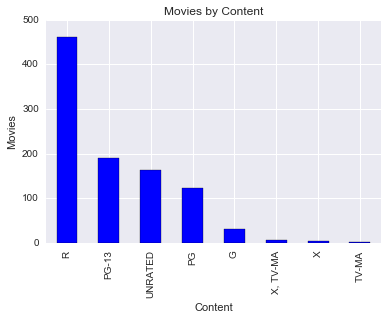

In [31]:
movies.content_rating.value_counts().plot(kind='bar', title='Movies by Content')
plt.xlabel('Content')
plt.ylabel('Movies')

In [27]:
#count the number of missing values in each column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [29]:
#if there are missing values: examine them, then fill them in with "reasonable" values
movies[movies.content_rating.isnull()]
movies.content_rating.fillna('UNRATED', inplace=True)

In [30]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [34]:
#calculate the average star rating for movies 2 hours or longer
#compare that with the average star rating for movies shorter than 2 hours

movies[movies.duration >= 120].star_rating.mean()

7.9488986784140971

In [35]:
movies[movies.duration < 120].star_rating.mean()

7.8386666666666649

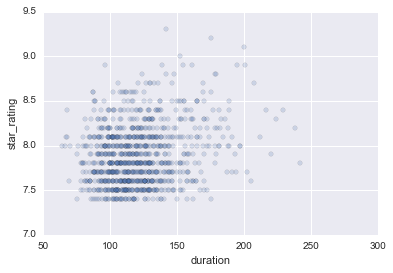

In [36]:
#use a visualization to detect whether there is a relationship between duration and star rating
movies.plot(kind='scatter', x='duration', y='star_rating', alpha=0.2)

In [37]:
#calculate the average duration for each genre
#movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BB3BCF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BDBBAC8>]], dtype=object)

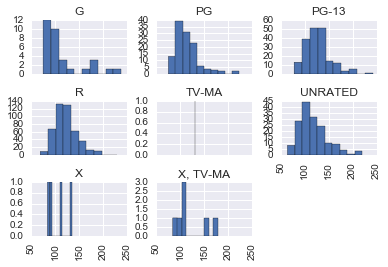

In [38]:
#visualize the relationship between content rating and duration
movies.hist(column='duration', by='content_rating', sharex=True)

In [39]:
#determine the top rated movie (by star rating) for each genre
movies.sort('star_rating', ascending=False).groupby('genre').title.first()
movies.groupby('genre').title.first() 

C:\Users\linje3\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                   Life Is Beautiful
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

In [40]:
#check if there are multiple movies with the same title, and if so, determine if they are actually duplicates

dupe_titles = movies[movies.title.duplicated()].title
movies[movies.title.isin(dupe_titles)]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [41]:
#calculate the average star rating for each genre, but only include genres with at least 10 movies

genre_ratings = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_ratings[genre_ratings['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000
